This is a Python implementation of MATLAB demo code provided by the course *Monte Carlo Methods in Finance* provided by iversity.org

https://iversity.org/my/courses/monte-carlo-methods-in-finance/



# Week 2

####  demo_randm - Lecture 2.2

Random numbers can be generated using either the <code>random</code> module or the <code>numpy.random</code> submodule. Here we use the latter.

In [1]:
from __future__ import division
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

The function <code>numpy.random.rand</code> generates random numbers on the interval [0,1) with uniform probability (note that the interval is half-open).

In [2]:
print random.rand()

0.784076805708


An array of random numbers is generated by passing the shape of the array as an argument

In [3]:
print random.rand(5,4)

[[ 0.0714671   0.52506829  0.22673804  0.61994259]
 [ 0.45048357  0.9617814   0.6524866   0.17955775]
 [ 0.65814596  0.58695037  0.3174677   0.95595153]
 [ 0.36745997  0.2921151   0.62477942  0.80802879]
 [ 0.57427838  0.3858535   0.45571904  0.93045531]]


In NumPy (psuedo-)random numbers are generated using a deterministic algorithm. The numbers are therefore not truly random. By fixing the seed we can reproduce the same sequence.

( Note that numpy.random.seed is not thread safe, but it's sufficient for our purposes )

In [4]:
random.seed(seed=123)
print random.rand(2,3)
random.seed(seed=123)
print random.rand(2,3) # give the same output

[[ 0.69646919  0.28613933  0.22685145]
 [ 0.55131477  0.71946897  0.42310646]]
[[ 0.69646919  0.28613933  0.22685145]
 [ 0.55131477  0.71946897  0.42310646]]


Finally, we plot the PDF and CDF of the uniform distribution.

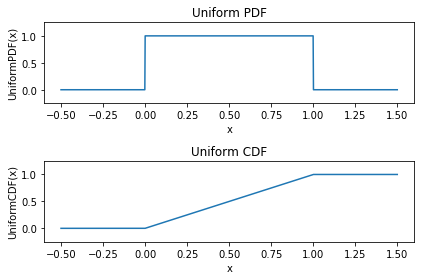

In [5]:
nPlots = 1000
xPlot = np.linspace(-0.5, 1.5, nPlots)

uniformPDF = np.where((xPlot >= 0) & (xPlot <= 1), 1, 0) 
# This is one of many ways in which you can define a piecewise function.
# np.where(A, b, c) takes a boolean array A (or converts A to a boolean array) and checks the thruth-value of each element A[i,j]
# The output is an array B of the same shape as A.
# when A[i,j] = True, then B[i,j] = b, and when A[i,j] = False then B[i,j] = c
# Note that here b and c are scalars, but they can be arrays as well

uniformCDF = uniformPDF * xPlot + np.where(xPlot >= 1, 1, 0)

plt.figure()
ax = plt.subplot(211)
plt.plot(xPlot, uniformPDF);
ax.set_title('Uniform PDF')
ax.set_xlabel('x')
ax.set_ylabel('UniformPDF(x)')
ax.set_ybound(-.25,1.25)

ax = plt.subplot(212)
ax.set_title('Uniform CDF')
ax.set_xlabel('x')
ax.set_ylabel('UniformCDF(x)')
plt.plot(xPlot, uniformCDF);
ax.set_ybound(-.25,1.25)

plt.tight_layout()
plt.show()

Alternatively, we can also define <code>uniformPDF</code> using slicing.

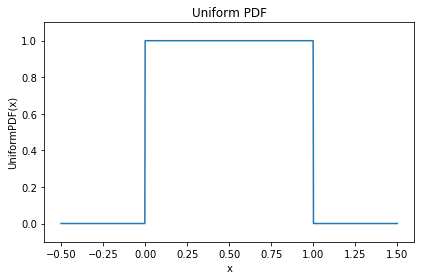

In [6]:
uniformPDF = np.zeros_like(xPlot)
uniformPDF[(xPlot >= 0) & (xPlot <= 1)] = 1


fig = plt.figure()
ax2 = plt.plot(xPlot, uniformPDF)
ax = fig.get_axes()[0]
ax.set_title('Uniform PDF')
ax.set_xlabel('x')
ax.set_ylabel('UniformPDF(x)')
ax.set_ybound(-.1, 1.1)
plt.tight_layout()
plt.show()

####  demo_randn - Lecture 2.3

Here we look at <code>numpy.random.randn</code> which generates random numbers from a Gaussian distribution. This functions draws random samples from the normal distribution with mean zero and standard deviation 1. We write this as $S\sim N(0,1)$.

In [7]:
random.seed(50)
print random.randn()
S = random.randn(3,4)
print S

-1.56035210868
[[-0.0309776  -0.62092842 -1.46458049  1.41194612]
 [-0.47673214 -0.78046921  1.07026774 -1.2822926 ]
 [-1.3274789   0.12633764  0.86219372  0.69673696]]


The PDF and CDF of the normal and other distributions are stored in the <code>scipy.stats</code> module. Another excellent statistics module is <code>statsmodels</code>, but we will stick to <code>scipy.stats</code>.

The class <code>scipy.stats.norm</code> (which we import below) holds different functions associated with the normal distribution, such as the PDF and the CDF.

See http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html for more info.

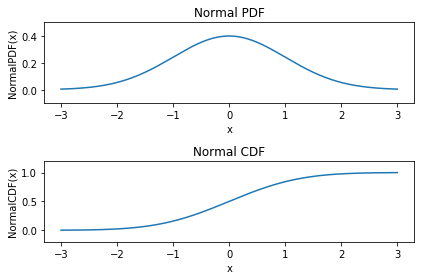

In [8]:
nPlots = 1000
alpha = 3
xPlot = np.linspace(-alpha, alpha, nPlots)

from scipy.stats import norm 

normPDF = norm.pdf(xPlot)
normCDF = norm.cdf(xPlot)


plt.figure()
ax = plt.subplot(211)
plt.plot(xPlot, normPDF);
ax.set_title('Normal PDF')
ax.set_xlabel('x')
ax.set_ylabel('NormalPDF(x)')
ax.set_ybound(-.1,.5)

ax = plt.subplot(212)
ax.set_title('Normal CDF')
ax.set_xlabel('x')
ax.set_ylabel('NormalCDF(x)')
plt.plot(xPlot, normCDF);
ax.set_ybound(-.2,1.2)

plt.tight_layout()
plt.show()

#### demo_normcdf and demo_normpdf - Lecture 2.4

We consider a normal distrubtion with mean mu and standard deviation sigma.

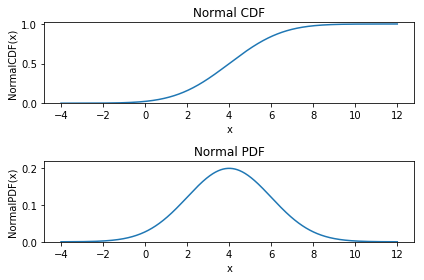

In [9]:
mu = 4
sigma = 2

alpha = 4
xMin = mu - alpha*sigma
xMax = mu + alpha*sigma

nPlot = 1000
xPlot = np.linspace(xMin,xMax,nPlot)
normPDF = norm.pdf(xPlot,mu,sigma) # the mean and standard deviation are passed as arguments to the pdf and cdf functions.
normCDF = norm.cdf(xPlot,mu,sigma)
def plotFigures(): # We use this figure again below
    plt.figure()
    ax = plt.subplot(211)
    ax.set_title('Normal CDF')
    ax.set_xlabel('x')
    ax.set_ylabel('NormalCDF(x)')
    plt.plot(xPlot, normCDF);
    ax.set_ybound(0,1.02)
    
    ax = plt.subplot(212)
    plt.plot(xPlot, normPDF)
    ax.set_title('Normal PDF')
    ax.set_xlabel('x')
    ax.set_ylabel('NormalPDF(x)')
    ax.set_ybound(0,1.1*norm.pdf(mu,mu,sigma))
    
    plt.tight_layout()
plotFigures()
plt.show()

Next we plot symmetric intervals around the mean for the PDF and CDF: $[\mu - \alpha \sigma, \mu + \alpha \sigma]$ with $\alpha$ integer.


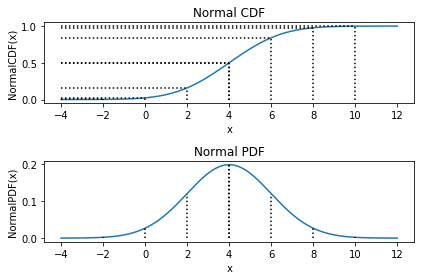

In [10]:
mu = 4
sigma = 2

plotFigures()
for alpha in range(0,4):
    xLower = mu - alpha * sigma
    xUpper = mu + alpha * sigma
    
    cdfLower = norm.cdf(xLower, mu, sigma)
    cdfUpper = norm.cdf(xUpper, mu, sigma)
    plt.subplot(211)
    plt.plot([xLower, xLower], [0, cdfLower], 'k:')
    plt.plot([xMin, xLower], [cdfLower, cdfLower], 'k:')
    plt.plot([xUpper, xUpper], [0, cdfUpper], 'k:')
    plt.plot([xMin, xUpper], [cdfUpper, cdfUpper], 'k:')
    
    plt.subplot(212)
    plt.plot([xLower, xLower], [0, norm.pdf(xLower,mu,sigma)], 'k:')
    plt.plot([xUpper, xUpper], [0, norm.pdf(xUpper,mu,sigma)], 'k:')

plt.tight_layout()
plt.show()

#### demo_normpdf

This demo again plots symmetric intervals around the mean

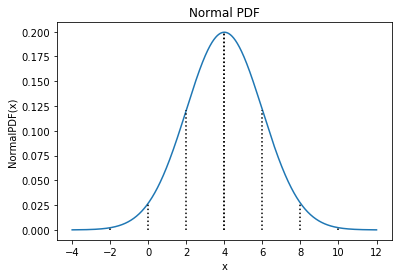

In [11]:
mu    = 4
sigma = 2

alpha = 4
xMin = mu - alpha*sigma
xMax = mu + alpha*sigma

nPlot = 1000
xPlot = np.linspace(xMin,xMax,nPlot)

normalPdf = norm.pdf(xPlot,mu,sigma);

fig = plt.figure()
plt.plot(xPlot, normPDF)
ax = fig.get_axes()[0]
ax.set_title('Normal PDF')
ax.set_xlabel('x')
ax.set_ylabel('NormalPDF(x)')
ax.set_ybound(0,1.1*norm.pdf(mu,mu,sigma))

for alpha in [0,1,2,3]:
   xLower = mu-alpha*sigma
   xUpper = mu+alpha*sigma
   plt.plot([xLower, xLower],[0, norm.pdf(xLower,mu,sigma)],'k:');
   plt.plot([xUpper, xUpper],[0, norm.pdf(xUpper,mu,sigma)],'k:');

plt.show()

#### demo_graphicalComparisonPdf -- Lecture 2.5

If $Log[S]$ is normally distributed we write $\log[S] \sim N(\mu, \sigma)$. Then the distribution of $S$ is lognormal, denoted $S\sim \log N(\mu, \sigma)$.

We generate lognormal data as

In [12]:
np.random.seed(99)
mu    = 1
sigma = 0.5

M = 1000 # sample size

S = np.exp(mu + sigma*random.randn(M))

Sample estimates of input parameters of the distribution are

In [13]:
hat_mu    = np.mean(np.log(S))
hat_sigma = np.std(np.log(S))
print hat_mu, hat_sigma

1.02927514347 0.501400277218


Next we graphically compare the sample to the true distribution. For this we define a function graphicalComparisonPdf.

In [14]:
def graphicalComparisonPdf(X, modelPdf, scale = True, xMin = None, xMax = None):
    _X = X[np.logical_not(np.isnan(X))]
    if xMax is None:
        xMax = np.max(_X) # default parameter of xMax
    if xMin is None:
        xMin = np.min(_X) # default parameter of xMin
    nPlot = 1000
    xPlot = np.linspace(xMin, xMax, nPlot)
    yPlot = modelPdf(xPlot)
    
    nBins = np.min([np.sqrt(X.size), 40])  
    widthHistogram          = np.max(_X)- np.min(_X)
    averageHeightHistogram  = _X.size/nBins
    areaHistogram           = widthHistogram*averageHeightHistogram
    
    pdfScaleFactor = areaHistogram if not scale else 1 
    # if scale = False we rescale modelPDF(x) by the area of the histogram
    # if scale = True the histogram is scaled, such that its area is 1 (as is the case for modelPDF(x))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    _, _, p = plt.hist(_X, bins=int(round(nBins)), normed = scale)
    l, = plt.plot(xPlot, yPlot * pdfScaleFactor, 'r', linewidth=3)
    
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    if scale:
        plt.legend([l, p[0]], ['pdf(x)', 'scaled histogram'])
    else:
        plt.legend([l, p[0]], ['scaled pdf(x)', 'histogram'])
    plt.show()

We now want to compare our sample distribution to the exact lognormal distribution. scipy.stats again comes with a built-in lognormal distribution:

In [15]:
from scipy.stats import lognorm

However, this function is **not** the same as the matlab function lognpdf (or rather lognorm.pdf is not the same as matlab's lognpdf). In fact, the lognormal distribution of scipy.stats is a bit tricky, see here for more info:

http://nbviewer.ipython.org/url/xweb.geos.ed.ac.uk/~jsteven5/blog/lognormal_distributions.ipynb

The numpy version of Matlab's lognpdf can be defined in two ways: in terms of elementary functions, or by rescaling lognorm.pdf.

In [16]:
def lognpdf_1(x,mean,sig):
    return np.where((x > 0) & np.isfinite(x) , np.exp(-(np.log(x)-mean)**2/(2.*sig**2)) /(x*sig*np.sqrt(2*np.pi)), 0 )

def lognpdf_2(x,mean,sig):
    return lognorm.pdf(x, scale = np.exp(mean), s = sig)

These funtions create the same pdf.

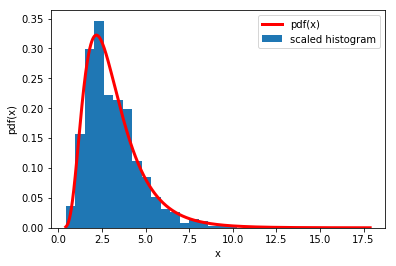

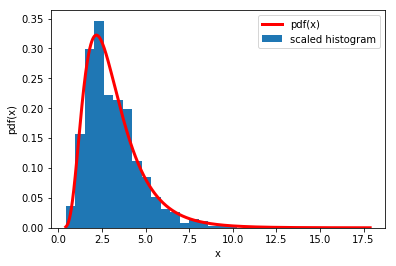

In [17]:
def lognpdf_fixed_mu_sigma_1(x):
    return lognpdf_1(x, hat_mu, hat_sigma)
def lognpdf_fixed_mu_sigma_2(x):
    return lognpdf_2(x, hat_mu, hat_sigma)

graphicalComparisonPdf(S, lognpdf_fixed_mu_sigma_1)
plt.show()
graphicalComparisonPdf(S, lognpdf_fixed_mu_sigma_2)

#### demo_histogramNormpdf: Comparison of histogram and normpdf -- Lecture 2.5

In [18]:
np.random.seed(55)
#parameters
mu = -4
sigma = 2
# sample size
M = 10000;

# X ~ N(mu,sigma)
X = mu + sigma*np.random.randn(M)
plt.show()

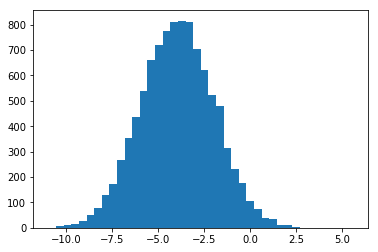

In [19]:
plt.figure()
nBins = 40;    # number of bins for the histogram
plt.hist(X,nBins); # generate histogram
plt.show()

# base of histogram
xMin = np.min(X);
xMax = np.max(X);

# area of histogram
areaHistogram = (xMax-xMin)*M/nBins;

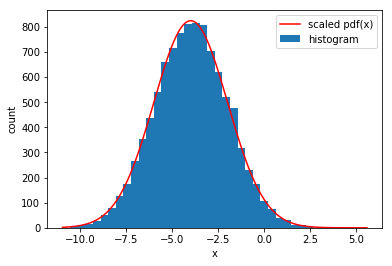

In [20]:
# compute values of the pdf in [xMin,xMax]
nPlot = 1000
xPlot = np.linspace(xMin,xMax,nPlot)
yPlot = norm.pdf(xPlot,mu,sigma)

# plot scaled pdf
fig = plt.figure()
_, _, p = plt.hist(X,nBins)
l, = plt.plot(xPlot,yPlot*areaHistogram,'r',linewidth=1.5)
ax = fig.get_axes()[0]
ax.set_xlabel('x')
ax.set_ylabel('count')
plt.legend([l, p[0]], ['scaled pdf(x)', 'histogram']);
plt.show()

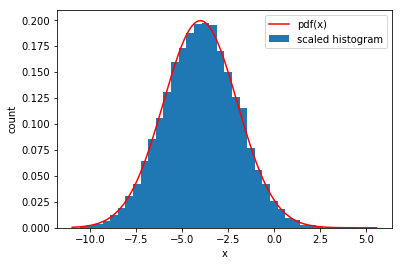

In [21]:
# Same figure but now with the histogram scaled

# plot scaled histogram
fig = plt.figure()
_, _, p = plt.hist(X,nBins, normed = True)
l, = plt.plot(xPlot,yPlot,'r',linewidth=1.5)
ax = fig.get_axes()[0]
ax.set_xlabel('x')
ax.set_ylabel('count')
plt.legend([l, p[0]], ['pdf(x)', 'scaled histogram']);
plt.show()

#### demo_graphicalComparisonCdf -- Lecture 2.6 --  Comparison of empirical cdf and normcdf

We consider a sample of normally distributed random variables.

In [22]:
np.random.seed(501)
mu = -4
sigma = 2

M = 100 # sample size
X = mu + sigma*np.random.randn(M)

We can define an emperical CDF from this sample using. It appears that <code>scipy.stats</code> does not come with a built-in emperical CDF function, so we import it from statsmodels instead.

This ECDF automatically sorts the data.

In [23]:
from statsmodels.distributions import ECDF as empericalCDF
eCDF = empericalCDF(X)

eCDF holds both the x and emperical CDF(x) values in eCDF.x and eCDF.y. To plot the CDF as a stair-like plot we use <code>plt.step</code>.

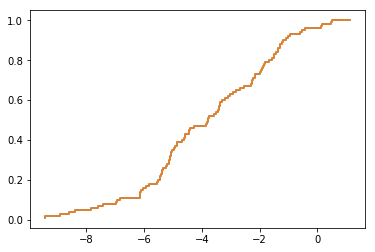

In [25]:
plt.step(eCDF.x, eCDF.y);
plt.show()

Next we compare this graphically to the true CDF. For this we define ``graphicalComparisonCdf``

In [26]:
def graphicalComparisonCdf(X, modelCdf, xMin = None, xMax  =None):
    _X = X[np.logical_not(np.isnan(X))] # get rid of possible nan's.
    if xMin is None:
        xMin = np.min(_X)
    if xMax is None:
        xMax = np.max(_X)
    
    nPlots = 1000
    fig = plt.figure()
    ax = plt.subplot(111)
    xPlot = np.linspace(xMin,xMax, nPlots)
    yPlot = modelCdf(xPlot)
    ecdf = empericalCDF(X)
    plt.step(ecdf.x, ecdf.y, label = 'empfcdf(x)');
    plt.plot(xPlot,yPlot,'r', label = 'normcdf(x)')
    ax.set_xlabel('x')
    ax.set_ylabel('probability')
    plt.legend(loc='lower right')
    plt.show();

And the plot.

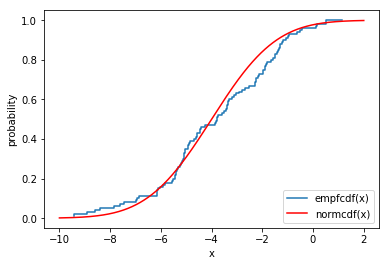

In [27]:
def cdf(x):
    return norm.cdf(x, mu, sigma)
graphicalComparisonCdf(X, cdf, mu - 3 * sigma, mu + 3 * sigma)

#### demo_graphicalComparisonCdf: Comparison of empirical and model cdf -- Lecture 2.6

We now perform a similar analysis for the lognormal distribution

In [28]:
np.random.seed(999)
mu = 1
sigma = .5
M = 100
S = np.exp(mu + sigma * np.random.randn(M))

Sample estimates are

In [29]:
hat_mu = np.mean(np.log(S))
hat_sigma = np.std(np.log(S))
print hat_mu, hat_sigma

1.09480438278 0.485396888756


The emperical CDF is

In [30]:
eCDF_lognorm = empericalCDF(S)

Next we define the exact CDF of the lognormal distribution. Again, the CDF provided by scipy.stats.lognorm needs to be used ''with care''.

In [31]:
from scipy.stats import lognorm
def lognormCDF(x):
    return lognorm.cdf(x, scale = np.exp(hat_mu), s = hat_sigma)

... and compare this with the emperical CDF

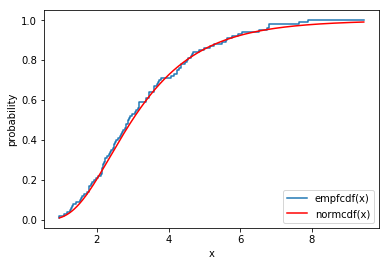

In [32]:
graphicalComparisonCdf(S, lognormCDF) # note that graphicalComparisonCdf determines the ECDF itself

#### demo_cdfinvNewtonRaphson: Inverse cdf with Newton-Raphson method -- Lecture 2.7

We again define the pdf and cdf of the normal distribution, with fixed parameters mu and sigma.

In [33]:
mu = 1
sigma = 3

def pdf(x):
    return norm.pdf(x, mu, sigma)
def cdf(x):
    return norm.cdf(x, mu, sigma)

Now we define a function cdfinvNewtonRaphson, which computes the inverse of the CDF using the Newton-Raphson method.

In [34]:
def cdfinvNewtonRaphson(p, pdf, cdf, x0):
    """
    Input:
    p : probability 0 <= p <= 1
    pdf : probability density function
    cdf : cumulative density function
    x0 : seed
    
    Output:
    x : where x solves cdf(x) = p
    """
    MAXITER = 100
    TOLABS = 1e-6
    
    x = np.ones_like(p, dtype = np.float)
    x.fill(x0) # initial seed
    
    dx = np.ones_like(p, dtype =np.float)
    dx.fill(10 * TOLABS)
    nIter = 0
    while (nIter < MAXITER) and (np.any(np.abs(dx) > TOLABS)):
        nIter += 1
        dx = (cdf(x) - p) / pdf(x)
        x = x - dx
    if nIter == MAXITER:
        print "Maximum number of iterations in NR reached"
    return x

In [35]:
M = 10000
p = np.arange(1, 2*M, 2, dtype = np.float) / (2*M)
X = cdfinvNewtonRaphson(p, pdf, cdf, mu)

We compare this to the true pdf using the earlier defined graphicalComparisonPdf.

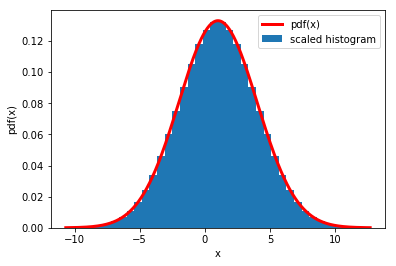

In [37]:
graphicalComparisonPdf(X, pdf)

#### demo_qqplot: quantile-quantile plot

It's time to apply some of the techniques to real data. This data is loaded using pandas

In [39]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2007-07-01", end="2013-06-30")

# download Panel
S = pdr.get_data_yahoo(["IBM", "GOOG"], start="2007-07-01", end="2013-06-30")['Adj Close']
Stocks = S.join(np.log(S).diff(), rsuffix='_log_diff' )
Stocks.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  2 of 2 downloaded


,GOOG,IBM,GOOG_log_diff,IBM_log_diff
Date,,,,
2007-07-02,263.476349,78.932228,NaN,NaN
2007-07-03,265.443542,80.112328,0.007439,0.014840
2007-07-05,269.065002,81.217270,0.013551,0.013698
2007-07-06,267.957184,81.953911,-0.004126,0.009029
2007-07-09,269.526978,81.908783,0.005841,-0.000551


We create a list of all log returns for easy access.

In [40]:
returns = [colnames for colnames in Stocks.columns if colnames.endswith('_diff') ]

In [41]:
mu = Stocks[returns].mean()
sigma = Stocks[returns].std()
print mu
print 
print sigma

GOOG_log_diff    0.000336
IBM_log_diff     0.000467
dtype: float64

GOOG_log_diff    0.020984
IBM_log_diff     0.015495
dtype: float64


``matplotlib`` does not have a built-in plot function for qqplots, so we import it from ``scipy.stats``.

In [42]:
from scipy.stats import probplot

GOOG_log_diff


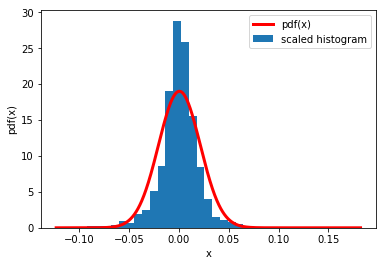

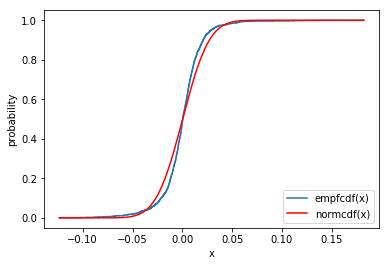

IBM_log_diff


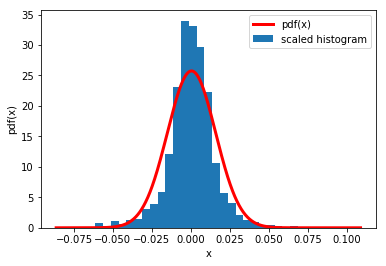

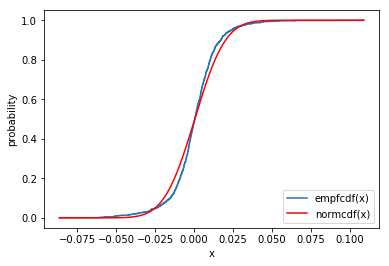

In [46]:
for s in returns:
    print s
    mu = Stocks[s].mean()
    sigma = Stocks[s].std()
    def pdf(x): return norm.pdf(x, mu, sigma)
    def cdf(x): return norm.cdf(x, mu, sigma)
    graphicalComparisonPdf(Stocks[s].values, pdf)
    graphicalComparisonCdf(Stocks[s].values, cdf)
    
    _S = Stocks[s].values 
    _S = _S[np.logical_not(np.isnan(_S))] # probplot cannot handle nan values, so we first get rid of them
    probplot(_S, dist = "norm")

The tails of the data is usually too fat for a normal distribution. Therefore we consider a t-distribution instead.

In [47]:
from scipy.stats import t as student_t

The student-t distribution is defined in terms of three parameters: mean, standard deviation and the degrees of freedom nu. To infer these from the data requires some special techniques, and so we use the fit method instead.

In [48]:
_S = Stocks[returns[0]].values 
_S = _S[np.logical_not(np.isnan(_S))] 
hat_nu, hat_mean, hat_sig = student_t.fit(_S)

GOOG_log_diff


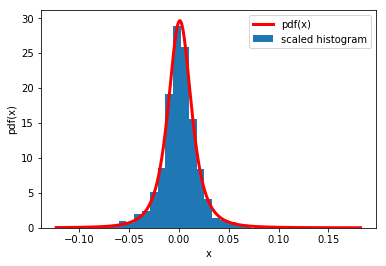

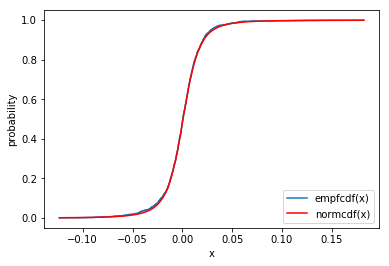

IBM_log_diff


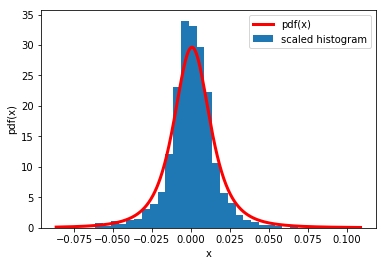

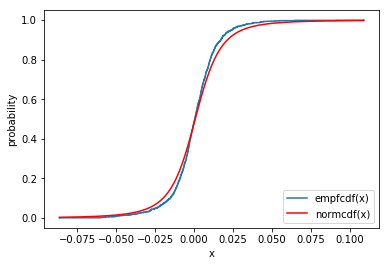

In [50]:
for s in returns:
    print s
    _S = Stocks[returns[0]].values 
    _S = _S[np.logical_not(np.isnan(_S))] 
    hat_nu, hat_mean, hat_sig = student_t.fit(_S)
    
    def pdf(x): return student_t.pdf(x, hat_nu, hat_mean, hat_sig)
    def cdf(x): return student_t.cdf(x, hat_nu, hat_mean, hat_sig)
    graphicalComparisonPdf(Stocks[s].values, pdf)
    graphicalComparisonCdf(Stocks[s].values, cdf)
    
    _S = Stocks[s].values 
    _S = _S[np.logical_not(np.isnan(_S))] # probplot cannot handle nan values, so we first get rid of them
    probplot(_S, sparams=(hat_nu, hat_mean, hat_sig), dist = "t")

#### expectedValue.m -- Lecture 2.9

A function required for the last two demos of this week is the expected value of a function g(X) given a pdf f_X.

In [51]:
from scipy.integrate import quad
def expectedValue(g, f_X, xLow, xUpp):
    """
    Input:
    g          : handle to the function g(X)
    f_X        : X ~ f_X (the pdf of X)
    xLow, xUPP : integration limits
    
    Output:
    E[g(X) | xLow <= X <= xUPP]
    """
    TOL = 1e-10
    def integrand(x):
        return f_X(x) * g(x)
    return quad(integrand, xLow, xUpp,  epsabs=TOL, epsrel=TOL)[0] / quad(f_X, xLow, xUpp,  epsabs=TOL, epsrel=TOL)[0]

#### demo_sampleAverage: Expected values vs. sample averages -- Lecture 2.10

Parameters of the distribution

In [52]:
mu = 3.
sigma = 2.

Emperical support

In [53]:
R = 10.
xLow = mu - R * sigma
xUpp = mu + R * sigma

Generate B samples of size M

In [54]:
B = 10000
M = 200
X = mu + sigma * np.random.randn(M,B)

Sample mean

In [55]:
sampleMean = np.mean(X, axis = 0)

Expected value, variance and standard deviation.

( The notation lambda x: g(x) is a short way of defining a function g. )

In [56]:
def f_X(x):
    return norm.pdf(x, mu, sigma)
E_X = expectedValue(lambda x: x, f_X, xLow, xUpp)
var_X = expectedValue(lambda x: (x-E_X)**2, f_X, xLow, xUpp)
std_X = np.sqrt(var_X)

The central limit theorem predicts that *mean* of our $B$ samples of data (each sample of size $M$) follows the normal distribution with mean $\mu$
and standard deviation $\sigma / \sqrt{M}$. Here we compare this statement graphically

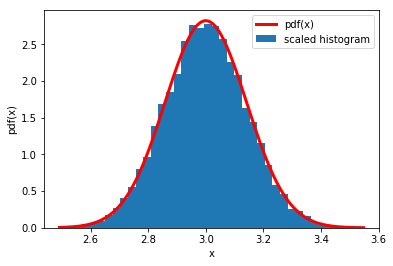

In [57]:
def modelPdf(x): return norm.pdf(x, E_X, std_X/np.sqrt(M) )
graphicalComparisonPdf(sampleMean, modelPdf, scale = True)

#### demo_MC_BlackScholes: MC calculation of E[ST] -- Lecture 2.12

Now we look at the Black-Scholes model

In [58]:
S0    = 100  # initial asset price
mu    = 0.1  # drift
sigma = 0.4  # volatility
T     = 2.0  # time in the future

The Black-Scholes model is given by

$X\sim N(0,1)$

$S(T,X) = S_0 \exp\left(\left(\mu-\sigma^2/2\right)T + \sigma\sqrt{T}X\right)$

In [60]:
def f_ST(x):
    return S0 * np.exp((mu-.5*sigma**2) * T + sigma * np.sqrt(T) * x)
R = 10
E_ST = expectedValue(f_ST, norm.pdf, -R, R) # note that norm.pdf has default parameters of mean = 0, sigma = 1

Sample mean

In [62]:
B   = 10000;
M   = 200;
X   = np.random.randn(M,B);
ST  = f_ST(X);

# B estimates of the sample mean
E_ST_MC  = np.mean(ST, axis = 0); #Each estimate is over a sample of size M

Monte Carlo error

In [63]:
error_MC = np.std(ST) / np.sqrt(M)
error_MC

5.2991090960043641

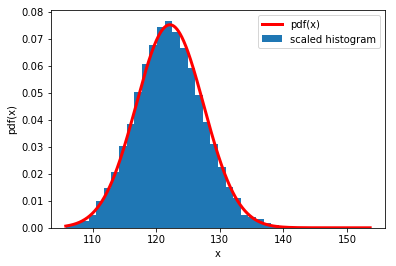

In [64]:
def modelPDF(x):
    return norm.pdf(x, E_ST, error_MC)

graphicalComparisonPdf(E_ST_MC, modelPDF)